<center><img src="graphics/Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

In [6]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [7]:
import scipy
import scipy.misc
from scipy import stats
import numpy as np
import urllib
import skimage
import skimage.color
import skimage.io
import skimage.exposure
import skimage.data
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform as tf

# Gray-scale image

In [8]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
# URL = "http://plzen.cz/kamera.php?0.8989779513794929"


(480, 640, 3)

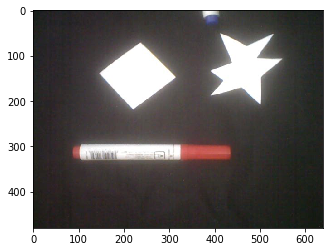

In [40]:
img = skimage.io.imread(URL, as_gray=False)
plt.imshow(img)
img.shape

In [41]:
img.shape

(480, 640, 3)

In [42]:
type(img)

numpy.ndarray

In [43]:
img.dtype

dtype('uint8')

In [14]:
dir(img)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [21]:
np.min(img)

0.03783960784313725

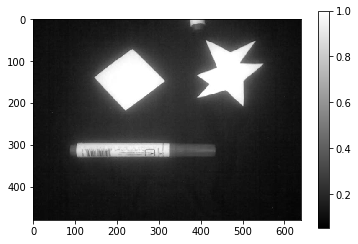

In [39]:
# from skimage import color
imggray = skimage.color.rgb2gray(img)
plt.imshow(imggray, cmap='gray')
plt.colorbar()

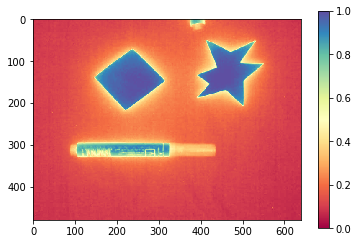

In [36]:
plt.imshow(img, vmin=0, vmax=1, cmap="Spectral")
plt.colorbar()

# Histogram

In [54]:
data = np.random.random([3,2])
print data
print ' '
print data.ravel()

[[ 0.40413883  0.74198448]
 [ 0.47878333  0.59829801]
 [ 0.06001238  0.20204042]]
 
[ 0.40413883  0.74198448  0.47878333  0.59829801  0.06001238  0.20204042]


In [73]:
np.min(img)
img.shape

(480, 640, 3)

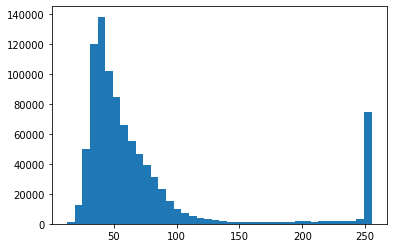

In [70]:
a, b, c = plt.hist(img.ravel(), 40)

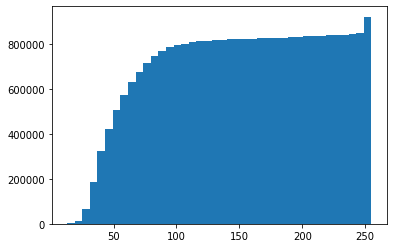

In [71]:
a, b, c = plt.hist(img.ravel(), 40, cumulative=True, density=False)

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


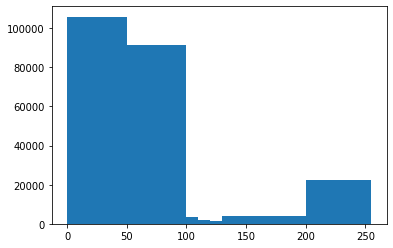

In [75]:
a, b, c = plt.hist(img[::2,::2].ravel(), bins=[0,50,100,110,120,130,200,255], normed=False)

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


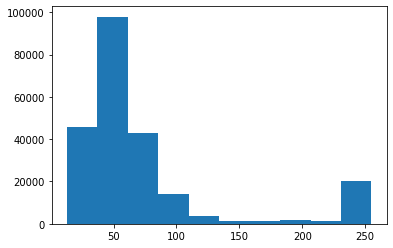

In [76]:
a, b, c = plt.hist(img[::2,::2].ravel(), 10, normed=False)

In [50]:
img.flatten()
img[::2,::2].ravel()
import timeit
timeit.timeit('import numpy as np; img = np.random.random([640,480]); img.ravel()', number=100)

# timeit.Timer('for i in xrange(10): oct(i)', 'gc.enable()').timeit()

33.75979259999997

In [51]:
timeit.timeit('import numpy as np; img = np.random.random([640,480]); img.flatten()', number=100)

50.953492900000015

(255,)
(256,)


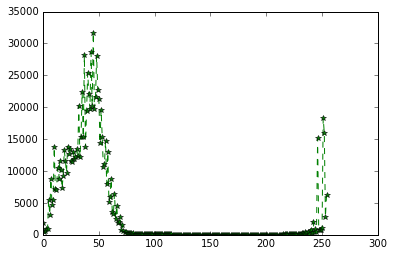

In [48]:
print a.shape
print b.shape
plt.plot(b[:-1], a, '*g--')




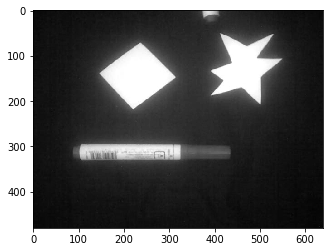

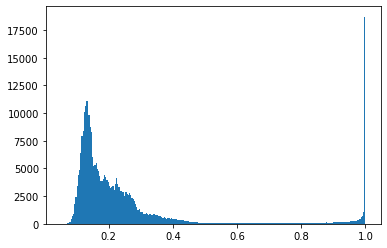

In [80]:

# import cv2

import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.misc
import urllib

import matplotlib.pyplot as plt

# scipy.misc.imread(
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"

img = skimage.io.imread(URL)

imgg = skimage.color.rgb2gray(img)
plt.imshow(imggray, cmap='gray')
plt.show()
a, b, c = plt.hist(imgg.ravel(),255)

# Intensity manipulation

## Lightening

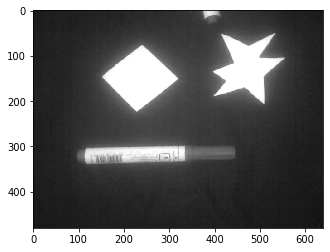

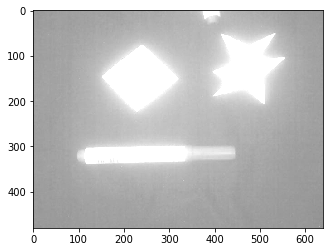

In [81]:
plt.figure()
plt.imshow(imgg, cmap='gray', clim=(0.0, 1.0))
plt.figure()
plt.imshow(imgg + 0.5, cmap='gray', clim=(0.0, 1.0))
# plt.colorbar()
plt.show()

## Data type overflow

min: 9, max: 255
min: 0, max: 255


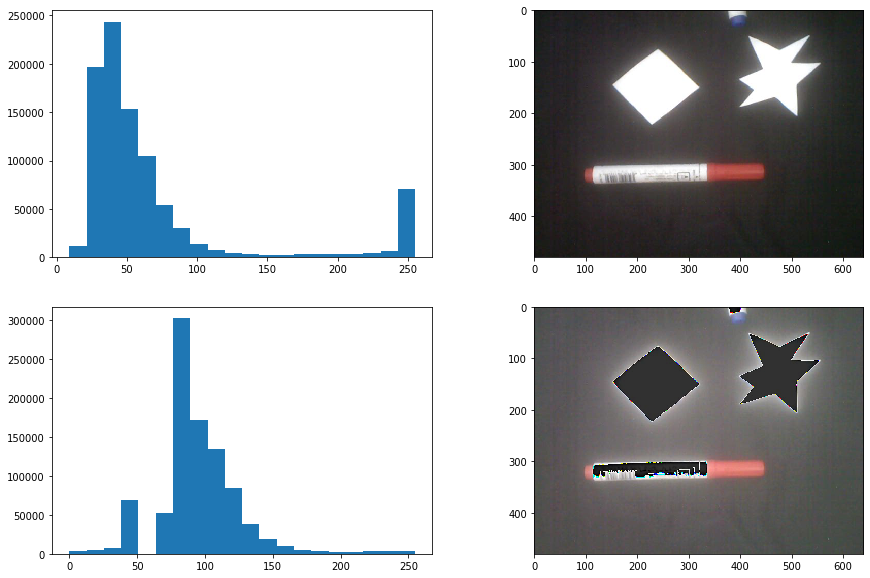

In [98]:
img.dtype

print(f"min: {np.min(img)}, max: {np.max(img)}")

plt.figure(figsize=[15,10])
plt.subplot(221)
plt.hist(img.ravel(), bins=20)

img2 = img + 50

plt.subplot(223)
plt.hist(img2.ravel(), bins=20)

print(f"min: {np.min(img2)}, max: {np.max(img2)}")

plt.subplot(222)
plt.imshow(img)
plt.subplot(224)
plt.imshow(img2)

## Contrast - Intensity rescale

[doc skimage.exposure_rescale_intensity](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)

DescribeResult(nobs=786432, minmax=(0, 255), mean=114.59900410970052, variance=6598.380953370378, skewness=-0.10452421555212746, kurtosis=-1.4427232139571773)


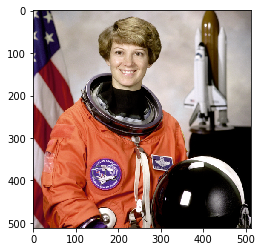

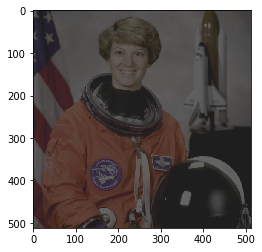

In [99]:
# img = skimage.color.rgb2gray(skimage.data.astronaut())
im = skimage.data.astronaut()
print(stats.describe(im, axis=None))
plt.imshow(im)
im_rescal = skimage.exposure.rescale_intensity(im, in_range=(0,255), out_range=(30,100))
plt.figure()
plt.imshow(im_rescal)

# Rotation and scale

[[0.11372549 0.10588235 0.10001137 0.09834471 0.10226627]
 [0.11372549 0.10588235 0.10001137 0.10001137 0.10226627]
 [0.11372549 0.10588235 0.09803922 0.10001137 0.10226627]
 [0.11175333 0.10588235 0.09803922 0.10001137 0.10226627]
 [0.11175333 0.1039102  0.09803922 0.09803922 0.10393294]]
[[0.05686275 0.05294118 0.05000569 0.04917235 0.05113314]
 [0.05686275 0.05294118 0.05000569 0.05000569 0.05113314]
 [0.05686275 0.05294118 0.04901961 0.05000569 0.05113314]
 [0.05587667 0.05294118 0.04901961 0.05000569 0.05113314]
 [0.05587667 0.0519551  0.04901961 0.04901961 0.05196647]]


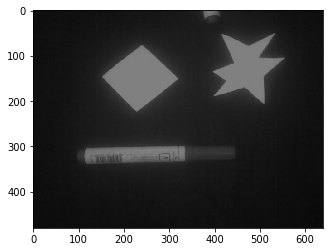

In [103]:
print(imgg[:5,:5])
imgg05 = imgg*0.5
print(imgg05[:5,:5])
plt.imshow(imgg05, cmap='gray', vmax=1, vmin=0)
plt.show()

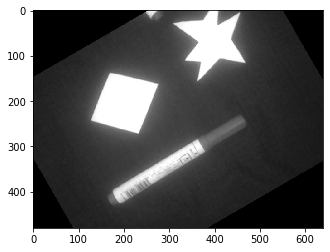

In [106]:
imr = skimage.transform.rotate(imgg, 30)
plt.imshow(imr, cmap='gray')
plt.show()

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


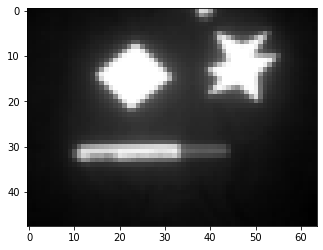

In [105]:
imgg_res = scipy.misc.imresize(imgg, 0.1)
plt.imshow(imgg_res, cmap='gray')
plt.show()

## Transform matrix

![Affine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/2D_affine_transformation_matrix.svg/449px-2D_affine_transformation_matrix.svg.png)

[Transformation matrix on wiky](https://en.wikipedia.org/wiki/Affine_transformation)

In [4]:
lena = skimage.io.imread("https://i.stack.imgur.com/3T6Gc.jpg")

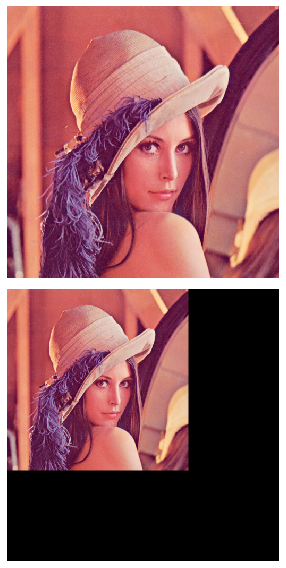

In [108]:
theta = np.pi/16
mat = np.array(
    [[1.5, 0, 0], 
     [0, 1.5, 0], 
     [0,   0, 1]]
)

tform0 = tf.ProjectiveTransform(matrix=mat)
warped = tf.warp(lena, tform0) 

fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

ax[0].imshow(lena, cmap=plt.cm.gray)
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

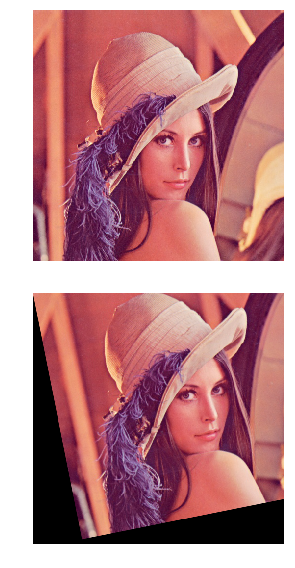

In [61]:
theta = np.pi/16
mat = np.array(
    [[np.cos(theta), -np.sin(theta), 0], 
     [np.sin(theta),  np.cos(theta), 0], 
     [0,              0,             1]]
)


tform0 = tf.ProjectiveTransform(matrix=mat)
warped = tf.warp(lena, tform0) #, output_shape=(600, 600))

fig, ax = plt.subplots(nrows=2, figsize=(8, 8))

ax[0].imshow(lena, cmap=plt.cm.gray)
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

## Transformation matrix parameters detection

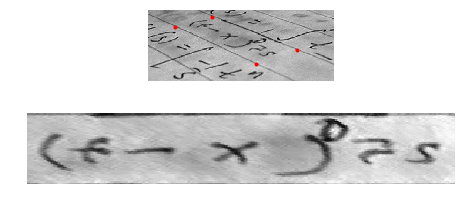

In [9]:

text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(8, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

In [11]:
tform3.params

array([[  5.25310835e-01,  -2.08383659e+00,   1.74271758e+02],
       [  2.35701599e-01,   5.25222025e-01,   1.68650089e+01],
       [ -6.74955595e-04,  -9.23623446e-04,   1.12433393e+00]])

## Usefull tool

In [11]:

import matplotlib.pylab as plt
import skimage.io
%matplotlib qt5
plt.imshow(lena)
uu = plt.ginput(n=4)
# plt.show()
uu

[(92.74392762049666, 89.41925229582125),
 (345.9200402108352, 114.4586480465141),
 (60.749144161278025, 292.5165733847742),
 (315.31633429332175, 327.2935119274031)]

# Thresholding

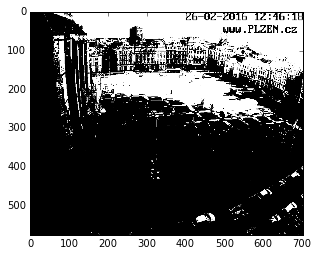

In [11]:
imthr = imggray > 0.5
plt.imshow(imthr, cmap='gray')

# Image counting

In [ ]:
import skimage.measure
imlabel = skimage.measure.label(imthr, background=0)
np.max(imlabel) + 1